In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

bg = cv2.imread("data/ComputerVidion/background.jpg", 1)
bg = cv2.resize(bg, (640, 480))
bg = cv2.cvtColor(bg, cv2.COLOR_BGR2RGB)

img = cv2.imread("data/ComputerVidion/StillImage.png", 1)
img = cv2.resize(img, (640, 480))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

difference = cv2.absdiff(bg, img)

_, difference_binary = cv2.threshold(difference, 20, 255, cv2.THRESH_BINARY)

new_bg = cv2.imread("data/ComputerVidion/FakeBackground.png", 1)
new_bg = cv2.resize(new_bg, (640, 480))
new_bg = cv2.cvtColor(new_bg, cv2.COLOR_BGR2RGB)

output = np.where(difference_binary == 0, new_bg, img)
cv2.imwrite("data/ComputerVidion/output.png", output)

In [ ]:
def computeDifference(bg_img, input_img):
    # Tính giá trị khác biệt tuyệt đối giữa 2 bức ảnh
    difference_three_channel = np.abs(bg_img - input_img)

    # Chuyển sự khác biệt 3 kênh sang 1 kênh bằng cách tính giá trị trung bình
    # Giúp giảm giá trị khác biệt xuống 1 giá trị cường độ đơn lẻ
    difference_single_channel = np.sum(difference_three_channel, axis=2) / 3.0

    # Chuyển đổi lại sang uint8 để phù hợp với xử lý ảnh
    difference_single_channel = difference_single_channel.astype(np.uint8)

    return difference_single_channel


def computeBinaryMask(difference_single_channel, threshold=15):
    # Áp dụng ngưỡng để tạo mask nhị phân
    difference_binary = np.where(difference_single_channel >= threshold, 255, 0)

    # Ghép mask nhị phân thành 3 kênh để phù hợp với định dạng RGB
    binary_mask = np.stack((difference_binary,) * 3, axis=-1)

    return binary_mask


def replaceBackground(bg_image1, bg_image2, ob_image):
    # Tính toán sự khác biệt giữa hình ảnh đối tượng và hình nền thứ 1
    difference_single_channel = computeDifference(bg_image1, ob_image)

    # Tính mask nhị phân dựa trên sự khác biệt
    binary_mask = computeBinaryMask(difference_single_channel)

    # Thay thế vị trí ảnh nền
    output = np.where(binary_mask == 255, ob_image, bg_image2)

    return output

In [ ]:
bg_image1 = bg
bg_image2 = new_bg
ob_image = img

difference = computeDifference(bg_image1, ob_image)
print(difference)
binary_mask = computeBinaryMask(difference)
plt.imshow(binary_mask)

# output2 = replaceBackground(bg_image1, bg_image2, ob_image)
# cv2.imwrite("data/ComputerVidion/output2.png", output2)



In [ ]:
arr1 = np.array([2, 3, 4])
arr2 = np.array([5, 5, 7])
stacked_array = np.stack((arr1, arr2), axis=1)
print(stacked_array)

In [ ]:
matrix1 = np.array([[1, 2], [3, 4]])
matrix2 = np.array([[5, 6], [7, 8]])
print(matrix1 + matrix2)

In [ ]:
mtx1 = [[1, 2], [3, 4]]
mtx2 = [[5, 6], [7, 8]]
print(mtx1 + mtx2)

In [ ]:
array = np.array([1, 2, 3, 4, 5, 6])
result = np.where(array > 3, 'A', 'B')
print(result)

Text(0.5, 1.0, 'new brighten img')

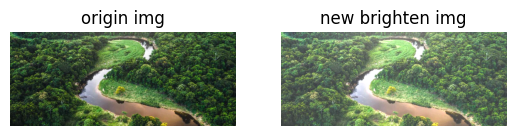

In [57]:
img7 = cv2.imread('data/ComputerVidion/nature.png', 1)
img7 = cv2.cvtColor(img7, cv2.COLOR_BGR2RGB)

new_img = img7.astype(np.float32) + 50
new_img = np.clip(new_img, 0, 255)
new_img = new_img.astype(np.uint8)

plt.subplot(121)
plt.imshow(img7)
plt.axis('off')
plt.title('origin img')

plt.subplot(122)
plt.imshow(new_img)
plt.axis('off')
plt.title('new brighten img')

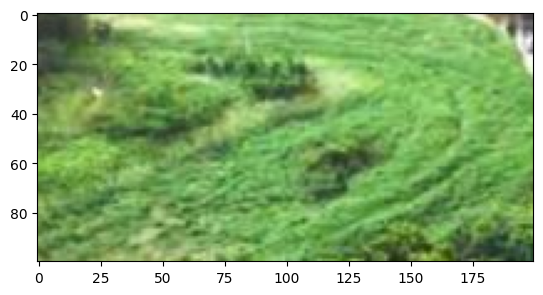

In [58]:
cropped_img = img7[50:150, 500:700]
plt.imshow(cropped_img)